____
__Universidad de San Andrés__<br/>
__Machine Learning__<br/>
__Trabajo Práctico 3: Redes Neuronales__<br/>
__Federico Gutman__
____

### Análisis y Preprocesamiento de Datos

#### Importamos las librerias necesarias

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import src.data_splitting as ds
import src.preprocessing as pr
import seaborn as sns
import pandas as pd
from src.metrics import plot_model_performance
from src.models import NeuralNetwork, NeuralNetworkPytorch
import torch
import torch.nn as nn

In [10]:
X_images = np.load("data/X_images.npy")
y_images = np.load("data/y_images.npy")

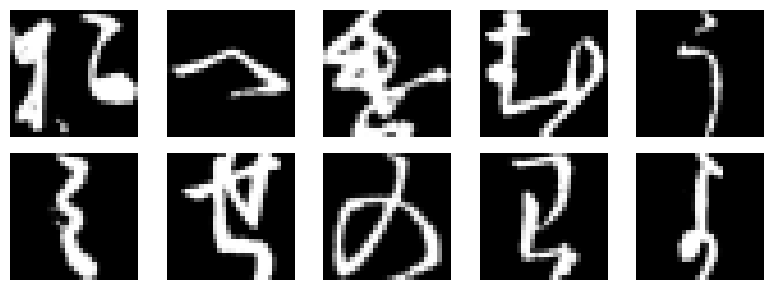

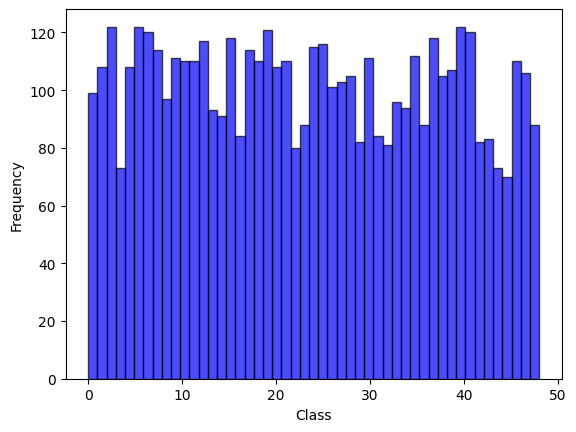

Number of images: 5000


In [11]:
pr.plot_images(X_images, nrows=2, ncolumns=5)
pr.histogram(y_images, bins=49)

print(f'Number of images: {len(X_images)}')

#### Dividimos el conjunto de datos en tres subconjuntos: Train, Validation y Test.

In [12]:
X_dev, X_test, y_dev, y_test = ds.split_dataset(X_images, y_images)

X_dev, X_test = pr.normalize(X_dev), pr.normalize(X_test)
y_dev, y_test = pr.one_hot_encoding(y_dev), pr.one_hot_encoding(y_test)

X_train, X_valid, y_train, y_valid = ds.split_dataset(X_dev, y_dev)

print(y_train.shape)

(3200, 49)


#### Entrenamos la red neuronal

Epoch 10/400 - Train Loss: 3.8588 - Val Loss: 3.8664 - Val Acc: 4.0000% - LR: 0.100000
Epoch 20/400 - Train Loss: 3.7913 - Val Loss: 3.8101 - Val Acc: 6.6250% - LR: 0.100000
Epoch 30/400 - Train Loss: 3.7162 - Val Loss: 3.7446 - Val Acc: 7.3750% - LR: 0.100000
Epoch 40/400 - Train Loss: 3.6235 - Val Loss: 3.6608 - Val Acc: 9.8750% - LR: 0.100000
Epoch 50/400 - Train Loss: 3.5083 - Val Loss: 3.5540 - Val Acc: 12.0000% - LR: 0.100000
Epoch 60/400 - Train Loss: 3.3678 - Val Loss: 3.4231 - Val Acc: 16.0000% - LR: 0.100000
Epoch 70/400 - Train Loss: 3.2020 - Val Loss: 3.2682 - Val Acc: 21.6250% - LR: 0.100000
Epoch 80/400 - Train Loss: 3.0212 - Val Loss: 3.0980 - Val Acc: 27.8750% - LR: 0.100000
Epoch 90/400 - Train Loss: 2.8373 - Val Loss: 2.9268 - Val Acc: 33.1250% - LR: 0.100000
Epoch 100/400 - Train Loss: 2.6619 - Val Loss: 2.7679 - Val Acc: 37.1250% - LR: 0.100000
Epoch 110/400 - Train Loss: 2.5020 - Val Loss: 2.6252 - Val Acc: 40.1250% - LR: 0.100000
Epoch 120/400 - Train Loss: 2.3586

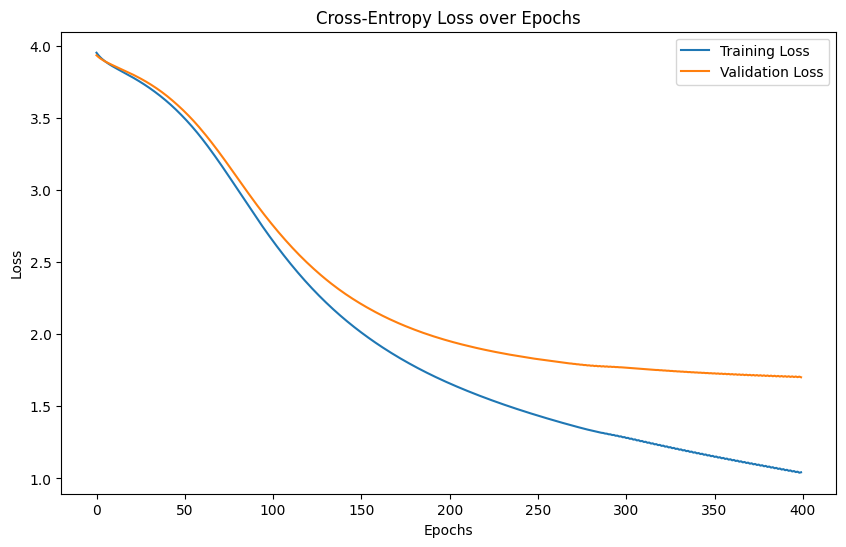

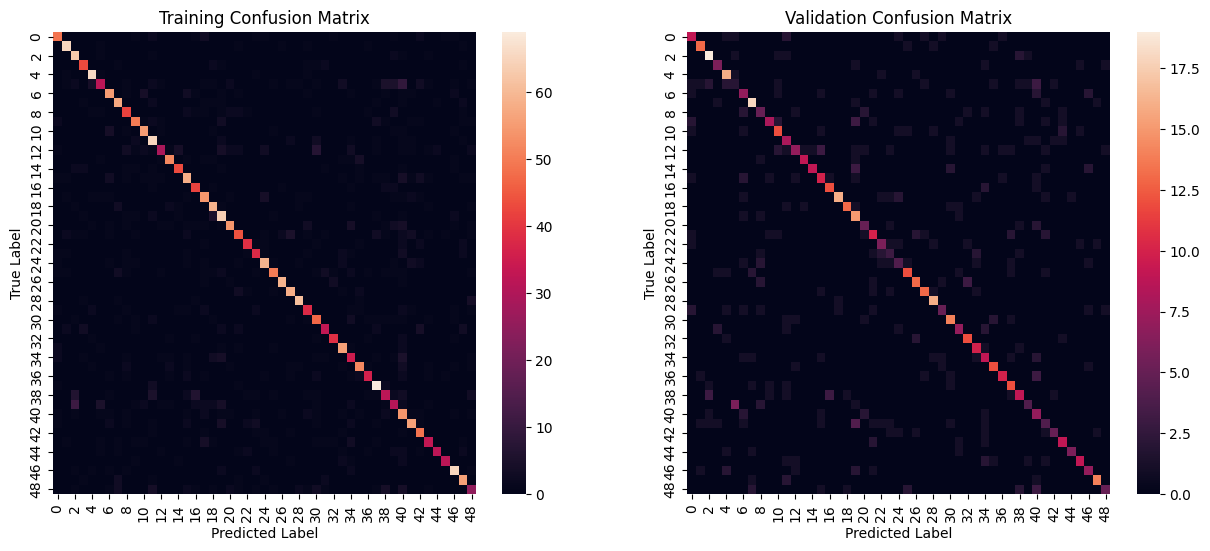

In [13]:
m0 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
m0.train(X_valid, y_valid, epochs=400, lr=0.1, optimizer='GD')

m0.accuracy(X_train, y_train, X_valid, y_valid)
m0.plot_loss()
m0.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

### Mejoras al algoritmo de entrenamiento

#### Learning Rate scheduling

##### LR Scheduling Lineal

Epoch 10/400 - Train Loss: 3.7984 - Val Loss: 3.8085 - Val Acc: 6.3750% - LR: 0.195500
Epoch 20/400 - Train Loss: 3.6423 - Val Loss: 3.6726 - Val Acc: 8.7500% - LR: 0.190500
Epoch 30/400 - Train Loss: 3.4147 - Val Loss: 3.4690 - Val Acc: 15.3750% - LR: 0.185500
Epoch 40/400 - Train Loss: 3.1074 - Val Loss: 3.1887 - Val Acc: 25.5000% - LR: 0.180500
Epoch 50/400 - Train Loss: 2.7745 - Val Loss: 2.8903 - Val Acc: 34.1250% - LR: 0.175500
Epoch 60/400 - Train Loss: 2.4813 - Val Loss: 2.6415 - Val Acc: 40.0000% - LR: 0.170500
Epoch 70/400 - Train Loss: 2.2477 - Val Loss: 2.4540 - Val Acc: 41.7500% - LR: 0.165500
Epoch 80/400 - Train Loss: 2.0652 - Val Loss: 2.3164 - Val Acc: 44.3750% - LR: 0.160500
Epoch 90/400 - Train Loss: 1.9907 - Val Loss: 2.3176 - Val Acc: 40.8750% - LR: 0.155500
Epoch 100/400 - Train Loss: 1.8593 - Val Loss: 2.1874 - Val Acc: 45.3750% - LR: 0.150500
Epoch 110/400 - Train Loss: 1.7439 - Val Loss: 2.1062 - Val Acc: 48.3750% - LR: 0.145500
Epoch 120/400 - Train Loss: 1.65

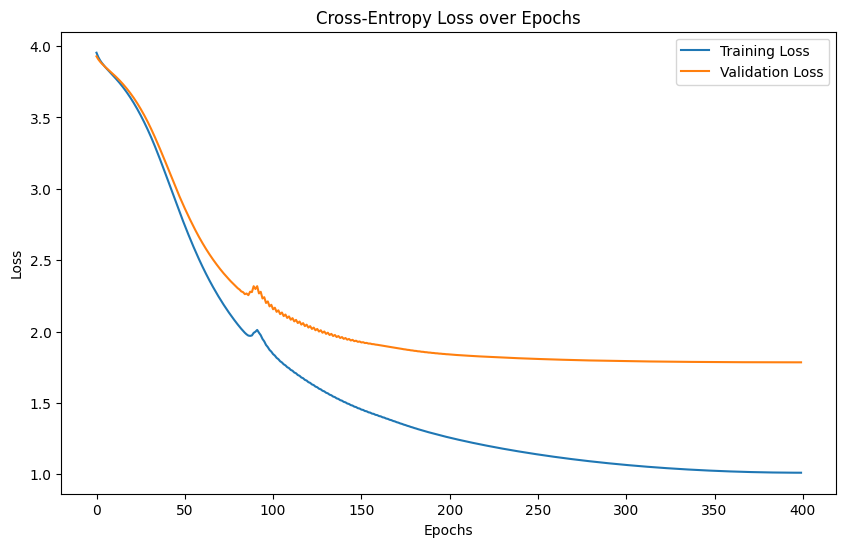

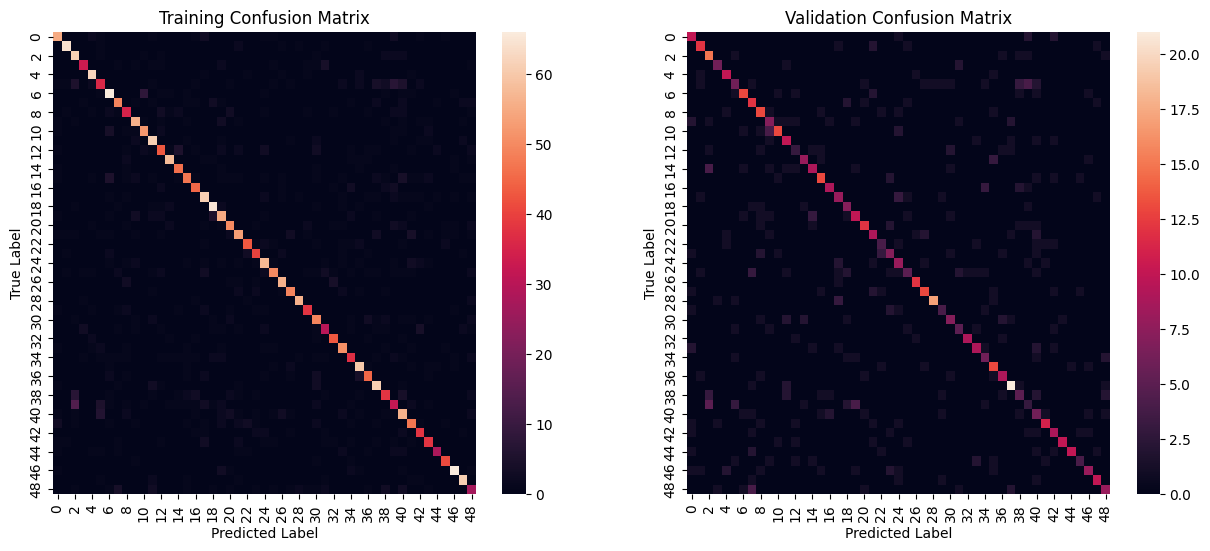

In [10]:
net1 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net1.train(X_valid, y_valid, epochs=400, lr=0.2, scheduling_type='Linear')

net1.accuracy(X_train, y_train, X_valid, y_valid)
net1.plot_loss()
net1.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

##### LR Scheduling Exponencial

Epoch 10/400 - Train Loss: 3.7996 - Val Loss: 3.8097 - Val Acc: 6.3750% - LR: 0.191178
Epoch 20/400 - Train Loss: 3.6501 - Val Loss: 3.6800 - Val Acc: 9.0000% - LR: 0.181831
Epoch 30/400 - Train Loss: 3.4405 - Val Loss: 3.4939 - Val Acc: 15.0000% - LR: 0.172942
Epoch 40/400 - Train Loss: 3.1659 - Val Loss: 3.2446 - Val Acc: 23.1250% - LR: 0.164486
Epoch 50/400 - Train Loss: 2.8655 - Val Loss: 2.9729 - Val Acc: 32.6250% - LR: 0.156445
Epoch 60/400 - Train Loss: 2.5933 - Val Loss: 2.7386 - Val Acc: 37.7500% - LR: 0.148796
Epoch 70/400 - Train Loss: 2.3695 - Val Loss: 2.5534 - Val Acc: 40.6250% - LR: 0.141522
Epoch 80/400 - Train Loss: 2.1922 - Val Loss: 2.4135 - Val Acc: 42.0000% - LR: 0.134603
Epoch 90/400 - Train Loss: 2.0506 - Val Loss: 2.3073 - Val Acc: 44.6250% - LR: 0.128022
Epoch 100/400 - Train Loss: 1.9365 - Val Loss: 2.2251 - Val Acc: 46.8750% - LR: 0.121763
Epoch 110/400 - Train Loss: 1.8426 - Val Loss: 2.1596 - Val Acc: 47.8750% - LR: 0.115810
Epoch 120/400 - Train Loss: 1.76

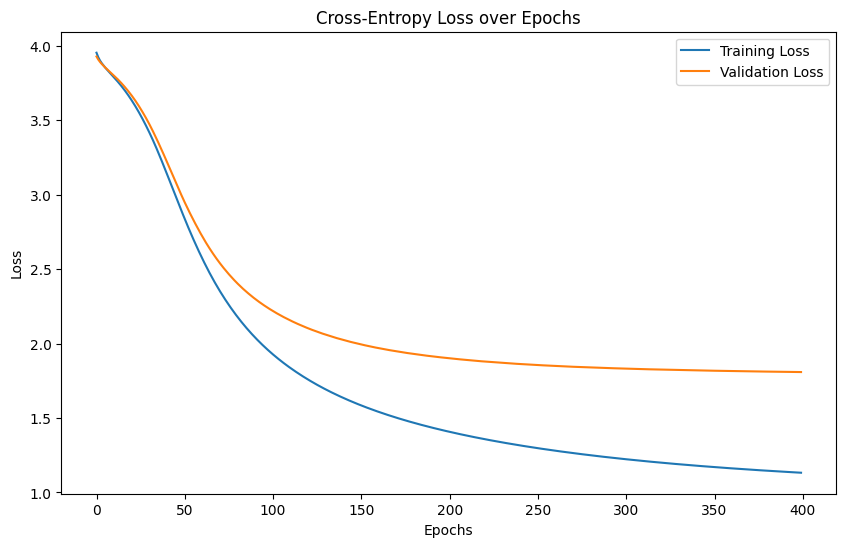

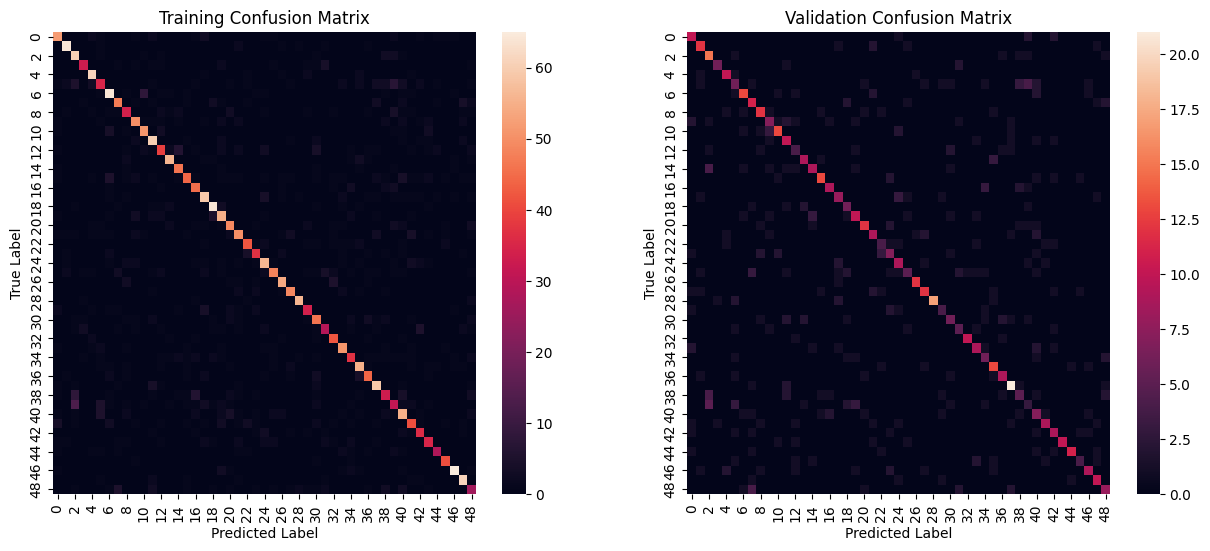

In [11]:
net2 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net2.train(X_valid, y_valid, epochs=400, lr=0.2, scheduling_type='Exp')
# Con un lr mas alto (0.2 por ejemplo) oscilan las curvas de loss (preguntar) esto en teoria no deberia pasar ya que el lr va bajando en cada iteracion

net2.accuracy(X_train, y_train, X_valid, y_valid)
net2.plot_loss()
net2.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

#### Mini-batch stochastic gradient descent

Epoch 10/60 - Train Loss: 2.7434 - Val Loss: 2.8018 - Val Acc: 35.7500% - LR: 0.010000
Epoch 20/60 - Train Loss: 1.7213 - Val Loss: 2.0469 - Val Acc: 49.1250% - LR: 0.010000
Epoch 30/60 - Train Loss: 1.3247 - Val Loss: 1.8501 - Val Acc: 54.7500% - LR: 0.010000
Epoch 40/60 - Train Loss: 1.0734 - Val Loss: 1.7952 - Val Acc: 56.7500% - LR: 0.010000
Epoch 50/60 - Train Loss: 0.8811 - Val Loss: 1.7784 - Val Acc: 56.5000% - LR: 0.010000
Epoch 60/60 - Train Loss: 0.7277 - Val Loss: 1.7884 - Val Acc: 57.5000% - LR: 0.010000
Train Accuracy: 83.62%, Validation Accuracy: 57.50%
Training Loss: 0.7277
Validation Loss: 1.7884


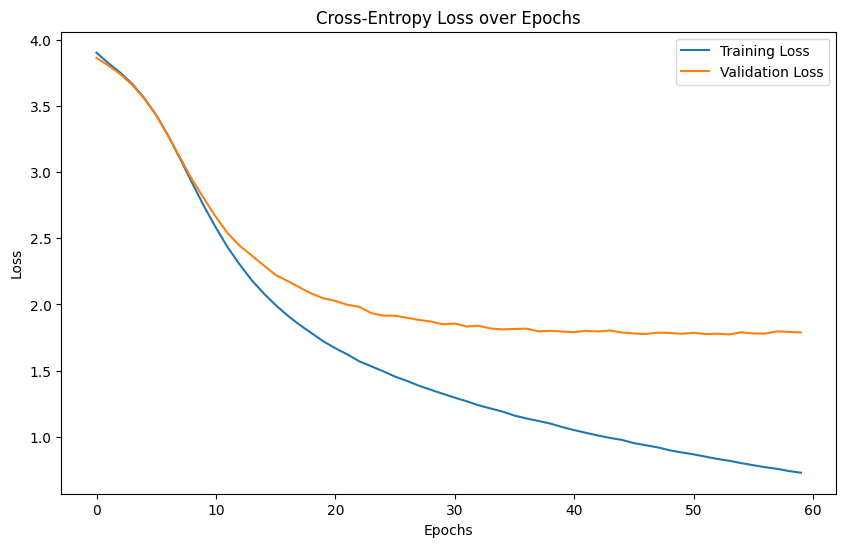

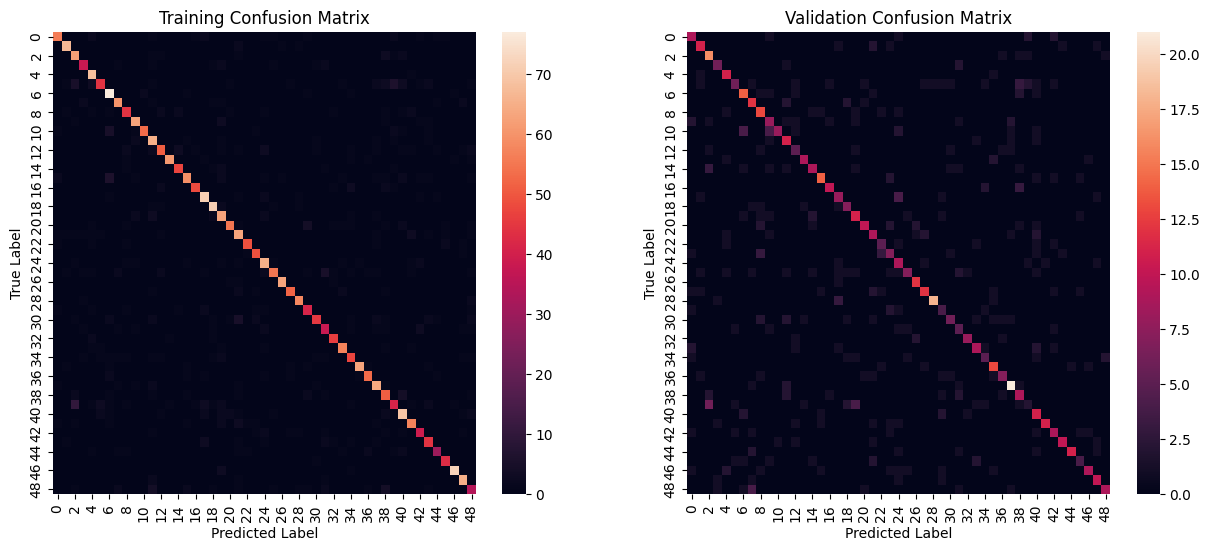

In [30]:
net3 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net3.train(X_valid, y_valid, epochs=60, lr=0.01, batch_size=32, optimizer='SGD') # OPTE POR USAR LR 1

net3.accuracy(X_train, y_train, X_valid, y_valid)
net3.plot_loss()
net3.plot_confusion_matrix(X_train, y_train, X_valid, y_valid) # PREGUNAR QUE ME IMPORTA LA LOSS DE TRAIN

#### Adaptive Moment Estimation (ADAM)

Epoch 10/100 - Train Loss: 3.4420 - Val Loss: 3.4636 - Val Acc: 14.7500% - LR: 0.001000
Epoch 20/100 - Train Loss: 2.4622 - Val Loss: 2.6167 - Val Acc: 41.1250% - LR: 0.001000
Epoch 30/100 - Train Loss: 1.7789 - Val Loss: 2.1167 - Val Acc: 48.7500% - LR: 0.001000
Epoch 40/100 - Train Loss: 1.3940 - Val Loss: 1.8908 - Val Acc: 54.1250% - LR: 0.001000
Epoch 50/100 - Train Loss: 1.1417 - Val Loss: 1.8034 - Val Acc: 55.5000% - LR: 0.001000
Epoch 60/100 - Train Loss: 0.9589 - Val Loss: 1.7678 - Val Acc: 55.8750% - LR: 0.001000
Epoch 70/100 - Train Loss: 0.8183 - Val Loss: 1.7608 - Val Acc: 55.8750% - LR: 0.001000
Epoch 80/100 - Train Loss: 0.7041 - Val Loss: 1.7700 - Val Acc: 57.3750% - LR: 0.001000
Epoch 90/100 - Train Loss: 0.6082 - Val Loss: 1.7848 - Val Acc: 58.0000% - LR: 0.001000
Epoch 100/100 - Train Loss: 0.5266 - Val Loss: 1.8067 - Val Acc: 58.1250% - LR: 0.001000
Train Accuracy: 89.84%, Validation Accuracy: 58.13%
Training Loss: 0.5266
Validation Loss: 1.8067


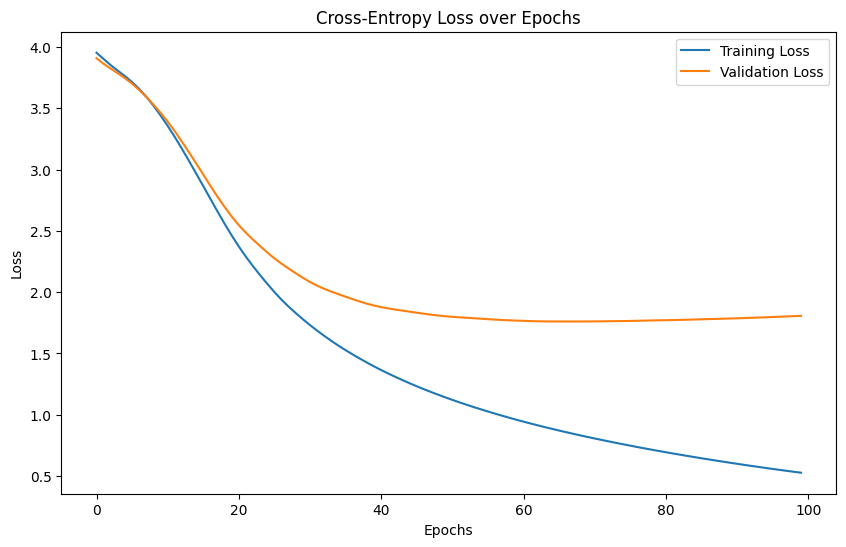

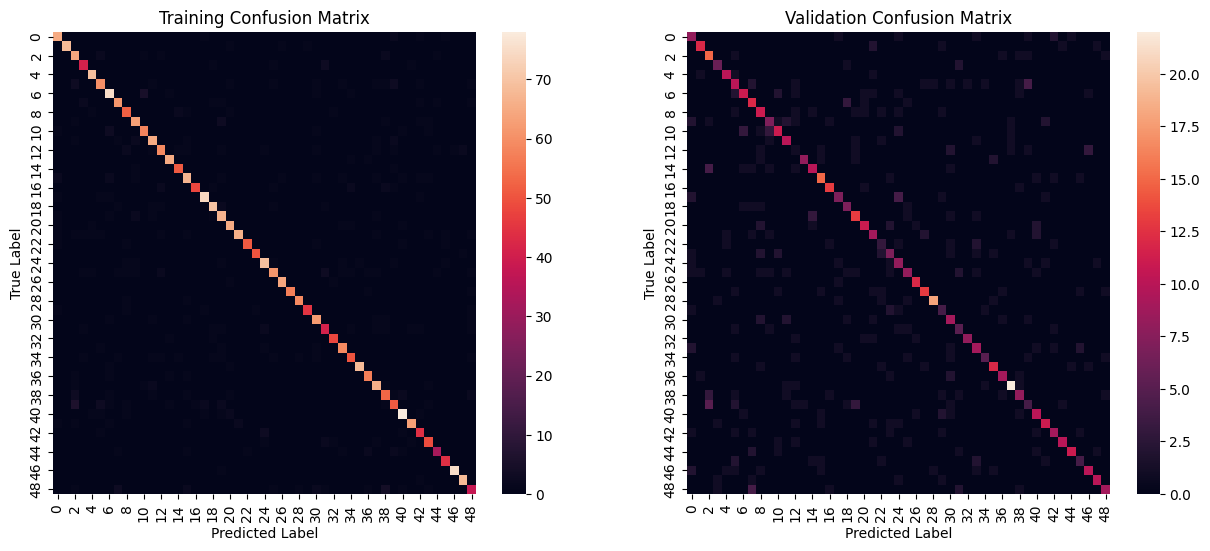

In [13]:
net4 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net4.train(X_valid, y_valid, epochs=100, lr=0.001, optimizer='ADAM')

net4.accuracy(X_train, y_train, X_valid, y_valid)
net4.plot_loss()
net4.plot_confusion_matrix(X_train, y_train, X_valid, y_valid) # PREGUNTAR QUE ME IMPORTA LA LOSS DE TRAIN -> poner q ajusta mejor a los datos de entremaniemto pero generaliza peor para los de validation

#### Regularización L2

Epoch 10/400 - Train Loss: 3.8600 - Val Loss: 3.8671 - Val Acc: 4.5000% - LR: 0.100000
Epoch 20/400 - Train Loss: 3.7898 - Val Loss: 3.8083 - Val Acc: 6.6250% - LR: 0.100000
Epoch 30/400 - Train Loss: 3.7135 - Val Loss: 3.7427 - Val Acc: 7.8750% - LR: 0.100000
Epoch 40/400 - Train Loss: 3.6187 - Val Loss: 3.6617 - Val Acc: 9.3750% - LR: 0.100000
Epoch 50/400 - Train Loss: 3.5011 - Val Loss: 3.5587 - Val Acc: 12.7500% - LR: 0.100000
Epoch 60/400 - Train Loss: 3.3578 - Val Loss: 3.4301 - Val Acc: 16.3750% - LR: 0.100000
Epoch 70/400 - Train Loss: 3.1877 - Val Loss: 3.2765 - Val Acc: 22.1250% - LR: 0.100000
Epoch 80/400 - Train Loss: 3.0021 - Val Loss: 3.1079 - Val Acc: 28.1250% - LR: 0.100000
Epoch 90/400 - Train Loss: 2.8138 - Val Loss: 2.9385 - Val Acc: 33.3750% - LR: 0.100000
Epoch 100/400 - Train Loss: 2.6355 - Val Loss: 2.7839 - Val Acc: 36.8750% - LR: 0.100000
Epoch 110/400 - Train Loss: 2.4728 - Val Loss: 2.6454 - Val Acc: 40.0000% - LR: 0.100000
Epoch 120/400 - Train Loss: 2.3287

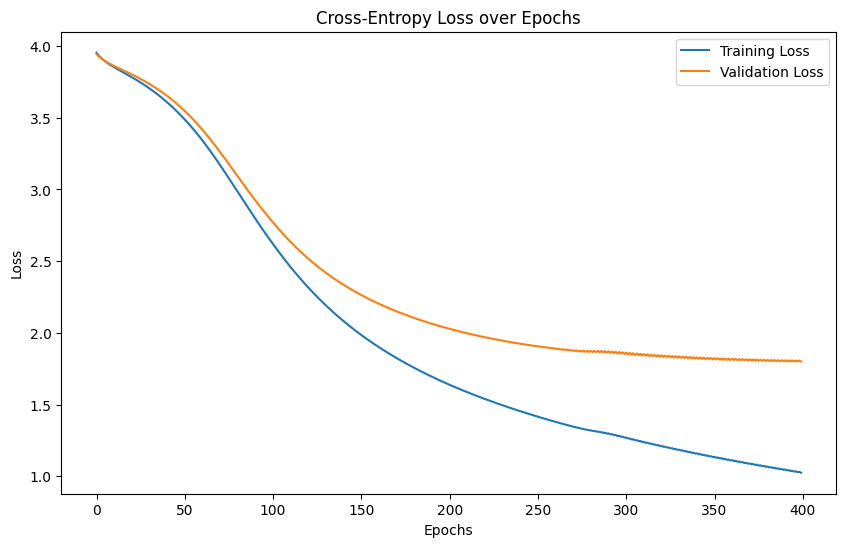

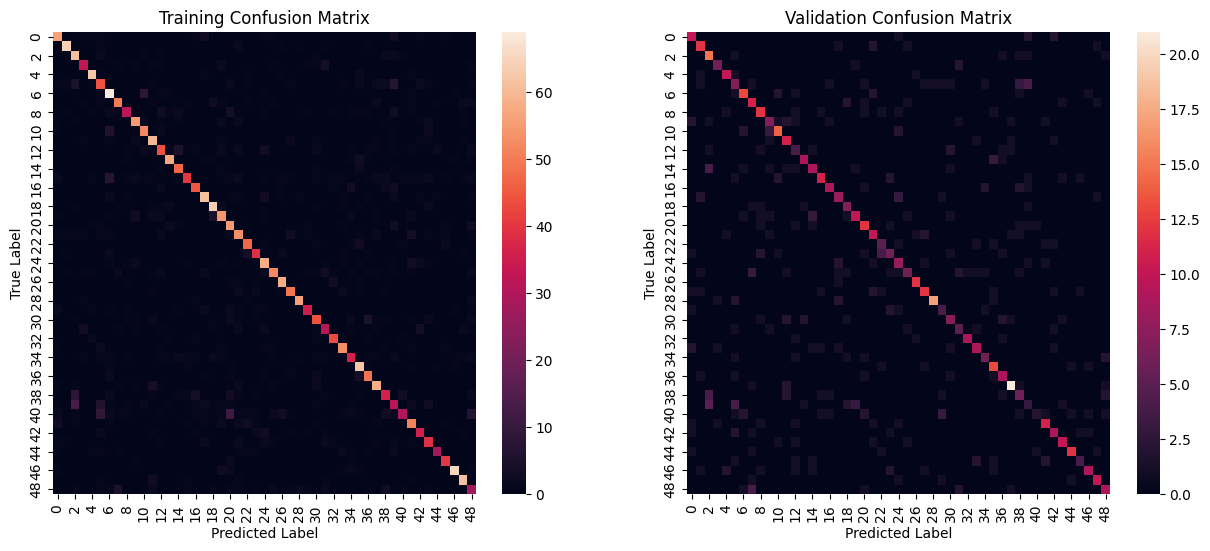

In [14]:
net5 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net5.train(X_valid, y_valid, epochs=400, lr=0.1, optimizer='GD', l2_lambda=0.01)

net5.accuracy(X_train, y_train, X_valid, y_valid)
net5.plot_loss()
net5.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

#### Early stopping

Epoch 10/600 - Train Loss: 3.8594 - Val Loss: 3.8651 - Val Acc: 4.5000% - LR: 0.100000
Epoch 20/600 - Train Loss: 3.7893 - Val Loss: 3.8062 - Val Acc: 6.6250% - LR: 0.100000
Epoch 30/600 - Train Loss: 3.7129 - Val Loss: 3.7406 - Val Acc: 7.8750% - LR: 0.100000
Epoch 40/600 - Train Loss: 3.6182 - Val Loss: 3.6597 - Val Acc: 9.3750% - LR: 0.100000
Epoch 50/600 - Train Loss: 3.5006 - Val Loss: 3.5567 - Val Acc: 12.7500% - LR: 0.100000
Epoch 60/600 - Train Loss: 3.3572 - Val Loss: 3.4280 - Val Acc: 16.3750% - LR: 0.100000
Epoch 70/600 - Train Loss: 3.1871 - Val Loss: 3.2744 - Val Acc: 22.1250% - LR: 0.100000
Epoch 80/600 - Train Loss: 3.0015 - Val Loss: 3.1058 - Val Acc: 28.1250% - LR: 0.100000
Epoch 90/600 - Train Loss: 2.8132 - Val Loss: 2.9363 - Val Acc: 33.5000% - LR: 0.100000
Epoch 100/600 - Train Loss: 2.6349 - Val Loss: 2.7817 - Val Acc: 36.8750% - LR: 0.100000
Epoch 110/600 - Train Loss: 2.4722 - Val Loss: 2.6432 - Val Acc: 40.0000% - LR: 0.100000
Epoch 120/600 - Train Loss: 2.3281

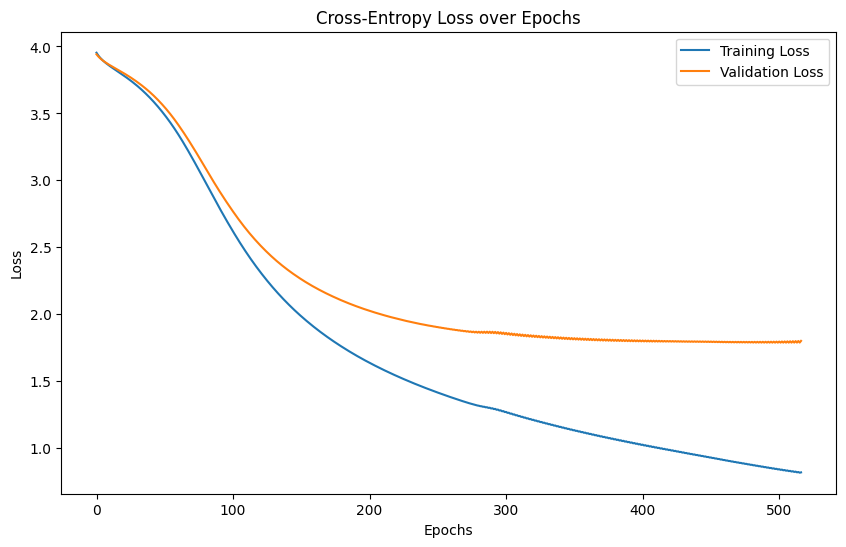

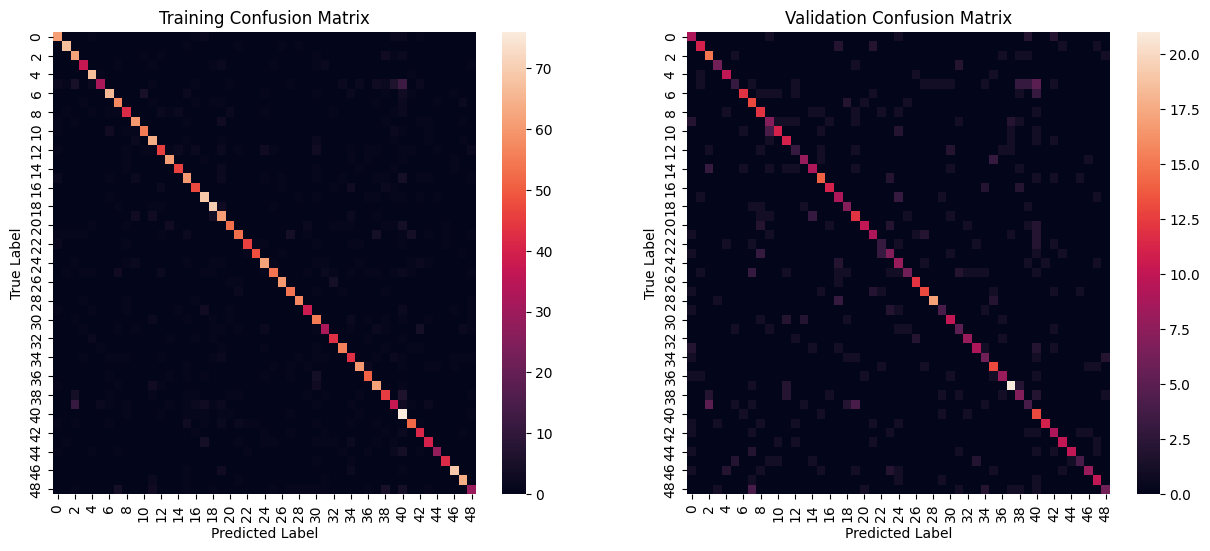

In [15]:
net6 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net6.train(X_valid, y_valid, epochs=600, lr=0.1, optimizer='GD', early_stopping=True) # XQ EN EARLY STOPPING COMPARO CON LA LOSS MAS BAJA Y NO CON LA ULTIMA?

net6.accuracy(X_train, y_train, X_valid, y_valid)
net6.plot_loss()
net6.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

#### Dropout

Epoch 10/400 - Train Loss: 3.8636 - Val Loss: 3.8687 - Val Acc: 4.2500% - LR: 0.100000
Epoch 20/400 - Train Loss: 3.7982 - Val Loss: 3.8183 - Val Acc: 6.3750% - LR: 0.100000
Epoch 30/400 - Train Loss: 3.7289 - Val Loss: 3.7537 - Val Acc: 8.2500% - LR: 0.100000
Epoch 40/400 - Train Loss: 3.6428 - Val Loss: 3.6813 - Val Acc: 9.5000% - LR: 0.100000
Epoch 50/400 - Train Loss: 3.5442 - Val Loss: 3.5914 - Val Acc: 12.2500% - LR: 0.100000
Epoch 60/400 - Train Loss: 3.4230 - Val Loss: 3.4844 - Val Acc: 16.5000% - LR: 0.100000
Epoch 70/400 - Train Loss: 3.2752 - Val Loss: 3.3502 - Val Acc: 20.7500% - LR: 0.100000
Epoch 80/400 - Train Loss: 3.1197 - Val Loss: 3.2098 - Val Acc: 26.7500% - LR: 0.100000
Epoch 90/400 - Train Loss: 2.9661 - Val Loss: 3.0706 - Val Acc: 31.6250% - LR: 0.100000
Epoch 100/400 - Train Loss: 2.8081 - Val Loss: 2.9435 - Val Acc: 35.2500% - LR: 0.100000
Epoch 110/400 - Train Loss: 2.6660 - Val Loss: 2.8316 - Val Acc: 37.3750% - LR: 0.100000
Epoch 120/400 - Train Loss: 2.5399

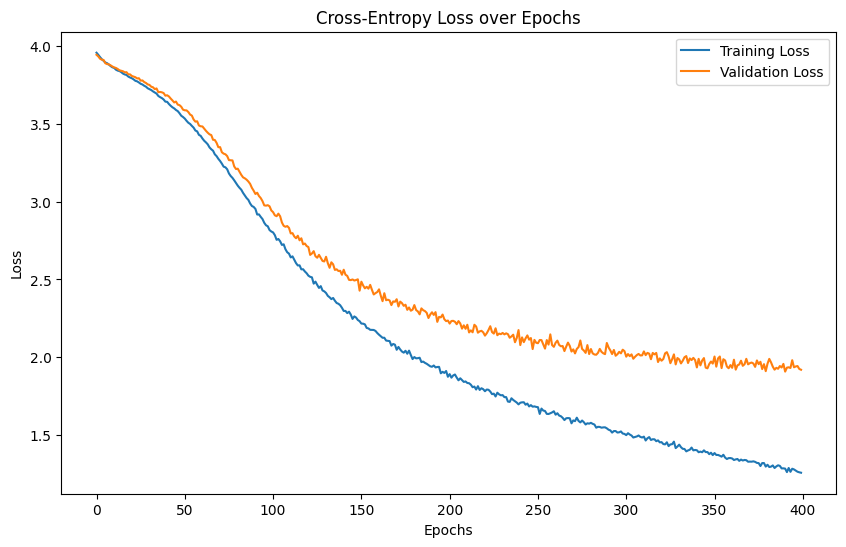

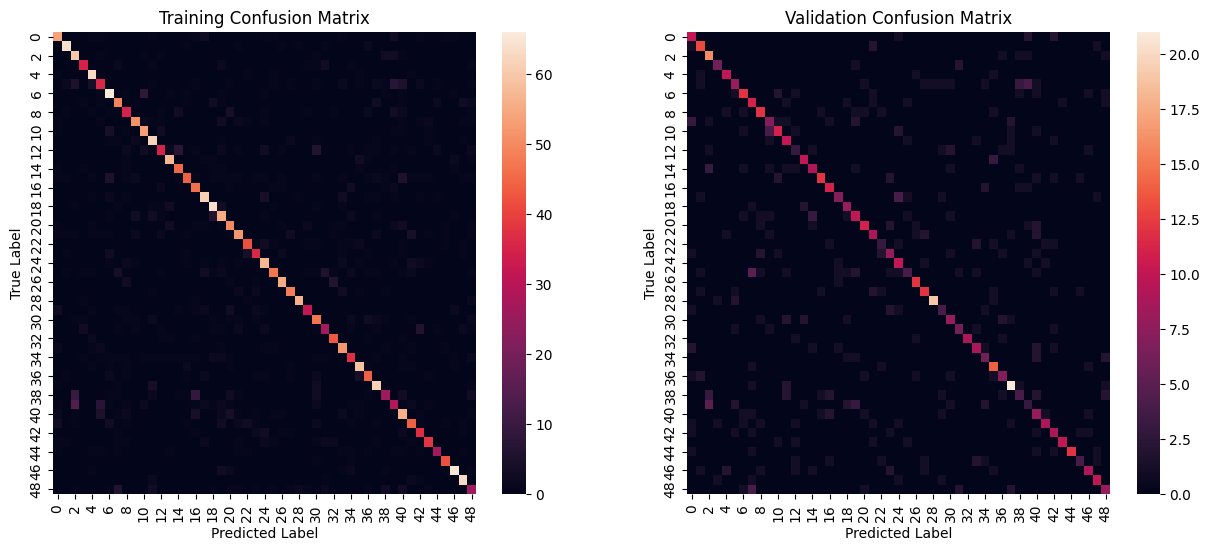

In [17]:
net7 = NeuralNetwork(X_train, y_train, [784, 100, 80, 49])
net7.train(X_valid, y_valid, epochs=400, lr=0.1, optimizer='GD', dropout_rate=0.05) # XQ EN EARLY STOPPING COMPARO CON LA LOSS MAS BAJA Y NO CON LA ULTIMA?

net7.accuracy(X_train, y_train, X_valid, y_valid)
net7.plot_loss()
net7.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

### Probamos distintas arquitecturas e hiperparámetros

In [ ]:
ds.cross_validation_grid_search(
    NeuralNetwork, X_valid, y_valid, 
    layer_sizes=[[784, 200, 49], [784, 100, 80, 49], [784, 200, 100, 80, 49]],
    l2s = [0, 0.00001, 0.0001],
    optimizers = ['SGD', 'ADAM'],
    batch_sizes = [32, 64],
    patiences = [10],
    dropouts = [0, 0.1],
    k_folds = 5
)

# METERLE SCHEDULINGS

layer_sizes=[784, 200, 49], lr=0.01, l2=0, batch=32, patience=10, dropout=0, opt=SGD -> acc=0.4437, train_loss=0.6765, val_loss=2.2021
layer_sizes=[784, 200, 49], lr=0.001, l2=0, batch=32, patience=10, dropout=0, opt=ADAM -> acc=0.4637, train_loss=0.1919, val_loss=2.2972
layer_sizes=[784, 200, 49], lr=0.01, l2=0, batch=32, patience=10, dropout=0.1, opt=SGD -> acc=0.4237, train_loss=1.0093, val_loss=2.3691
layer_sizes=[784, 200, 49], lr=0.001, l2=0, batch=32, patience=10, dropout=0.1, opt=ADAM -> acc=0.4637, train_loss=0.2276, val_loss=2.3409
layer_sizes=[784, 200, 49], lr=0.01, l2=0, batch=64, patience=10, dropout=0, opt=SGD -> acc=0.3950, train_loss=1.4350, val_loss=2.4652
layer_sizes=[784, 200, 49], lr=0.001, l2=0, batch=64, patience=10, dropout=0, opt=ADAM -> acc=0.4262, train_loss=0.2318, val_loss=2.3135
layer_sizes=[784, 200, 49], lr=0.01, l2=0, batch=64, patience=10, dropout=0.1, opt=SGD -> acc=0.3812, train_loss=1.6652, val_loss=2.6222
layer_sizes=[784, 200, 49], lr=0.001, l2=0,

Epoch 10/240 - Train Loss: 3.4181 - Val Loss: 3.4341 - Val Acc: 20.3750% - LR: 0.010000
Epoch 20/240 - Train Loss: 2.9079 - Val Loss: 2.9669 - Val Acc: 33.8750% - LR: 0.010000
Epoch 30/240 - Train Loss: 2.4845 - Val Loss: 2.5831 - Val Acc: 44.3750% - LR: 0.010000
Epoch 40/240 - Train Loss: 2.1717 - Val Loss: 2.3100 - Val Acc: 50.1250% - LR: 0.010000
Epoch 50/240 - Train Loss: 1.9463 - Val Loss: 2.1262 - Val Acc: 53.5000% - LR: 0.010000
Epoch 60/240 - Train Loss: 1.7792 - Val Loss: 1.9995 - Val Acc: 55.2500% - LR: 0.010000
Epoch 70/240 - Train Loss: 1.6508 - Val Loss: 1.9108 - Val Acc: 56.2500% - LR: 0.010000
Epoch 80/240 - Train Loss: 1.5474 - Val Loss: 1.8457 - Val Acc: 56.6250% - LR: 0.010000
Epoch 90/240 - Train Loss: 1.4610 - Val Loss: 1.7981 - Val Acc: 57.6250% - LR: 0.010000
Epoch 100/240 - Train Loss: 1.3871 - Val Loss: 1.7609 - Val Acc: 58.2500% - LR: 0.010000
Epoch 110/240 - Train Loss: 1.3221 - Val Loss: 1.7299 - Val Acc: 59.0000% - LR: 0.010000
Epoch 120/240 - Train Loss: 1.

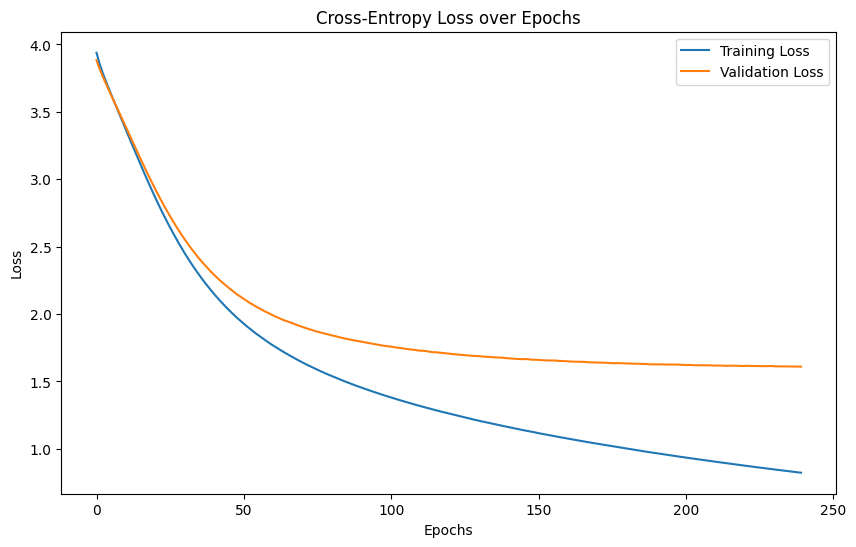

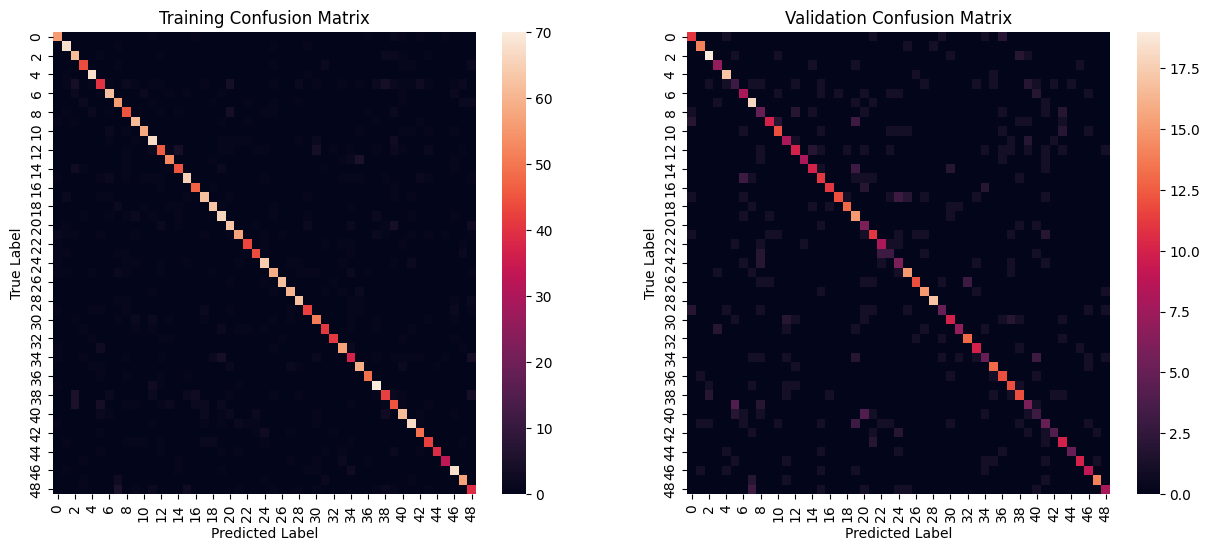

In [14]:
m1 = NeuralNetwork(X_train, y_train, [784, 200, 49])
m1.train(X_val=X_valid, y_val=y_valid, epochs=240, optimizer='SGD', lr=0.01, early_stopping=True, batch_size=128, l2_lambda=0.0001, patience=10, dropout_rate=0)

m1.accuracy(X_train, y_train, X_valid, y_valid)
m1.plot_loss()
m1.plot_confusion_matrix(X_train, y_train, X_valid, y_valid) # repoartar fenomoeno de mejor accuracy pero mayor loss a medida q avanzo en epochs

### Red Neuronal con PyTorch

Epoch 1/120, Train Loss: 3.8914, Val Loss: 3.8795
Epoch 2/120, Train Loss: 3.8764, Val Loss: 3.8668
Epoch 3/120, Train Loss: 3.8615, Val Loss: 3.8527
Epoch 4/120, Train Loss: 3.8446, Val Loss: 3.8360
Epoch 5/120, Train Loss: 3.8250, Val Loss: 3.8168
Epoch 6/120, Train Loss: 3.8027, Val Loss: 3.7951
Epoch 7/120, Train Loss: 3.7773, Val Loss: 3.7708
Epoch 8/120, Train Loss: 3.7490, Val Loss: 3.7442
Epoch 9/120, Train Loss: 3.7183, Val Loss: 3.7153
Epoch 10/120, Train Loss: 3.6850, Val Loss: 3.6839
Epoch 11/120, Train Loss: 3.6495, Val Loss: 3.6499
Epoch 12/120, Train Loss: 3.6118, Val Loss: 3.6134
Epoch 13/120, Train Loss: 3.5720, Val Loss: 3.5751
Epoch 14/120, Train Loss: 3.5306, Val Loss: 3.5347
Epoch 15/120, Train Loss: 3.4875, Val Loss: 3.4921
Epoch 16/120, Train Loss: 3.4425, Val Loss: 3.4474
Epoch 17/120, Train Loss: 3.3957, Val Loss: 3.4007
Epoch 18/120, Train Loss: 3.3471, Val Loss: 3.3521
Epoch 19/120, Train Loss: 3.2968, Val Loss: 3.3018
Epoch 20/120, Train Loss: 3.2448, Val Lo

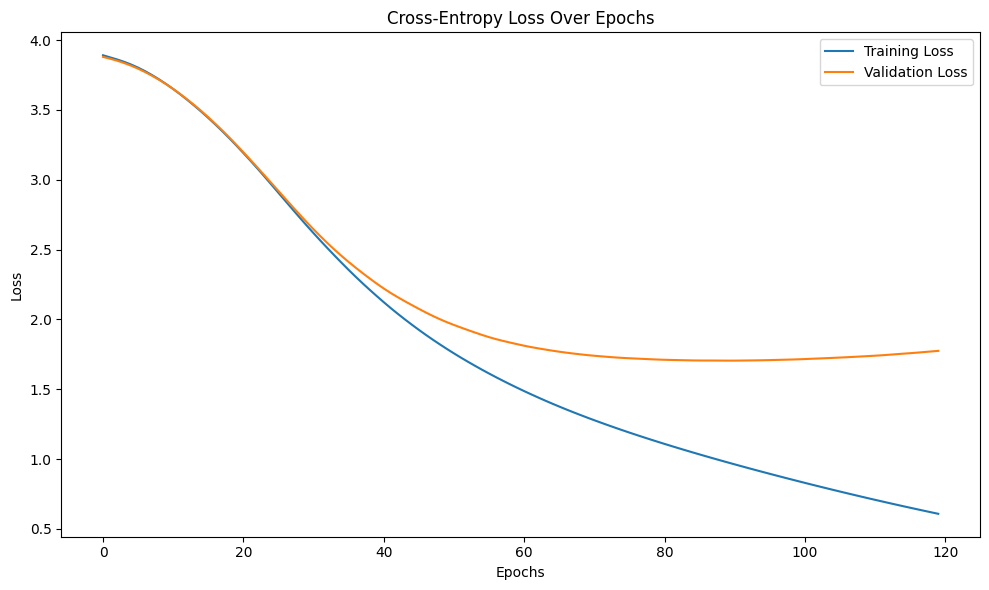

49


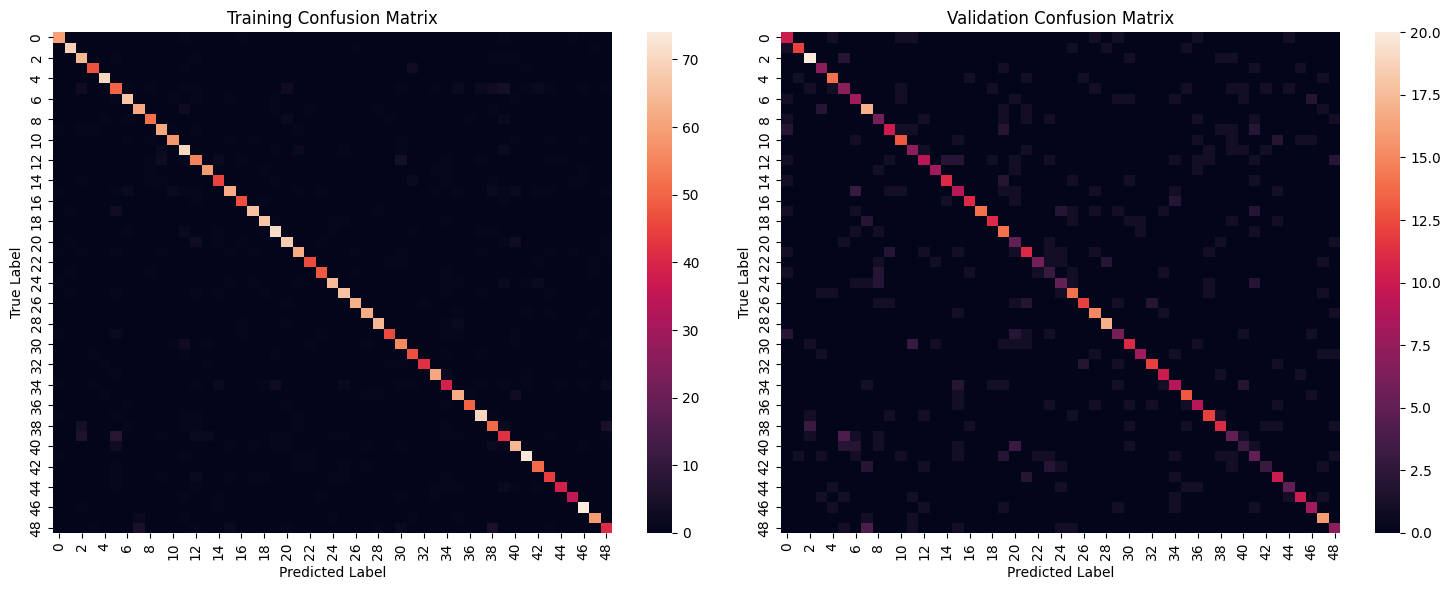

In [15]:
m2 = NeuralNetworkPytorch(input_size=784, hidden_layers=[100, 80], num_classes=49)
m2.train_model(X_train, y_train, X_val=X_valid, y_val=y_valid, epochs=120)

m2.accuracy(X_train, y_train, X_valid, y_valid)
m2.plot_losses()
m2.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)


Epoch 1/120, Train Loss: 3.8952, Val Loss: 3.8835
Epoch 2/120, Train Loss: 3.8781, Val Loss: 3.8710
Epoch 3/120, Train Loss: 3.8620, Val Loss: 3.8573
Epoch 4/120, Train Loss: 3.8442, Val Loss: 3.8414
Epoch 5/120, Train Loss: 3.8238, Val Loss: 3.8231
Epoch 6/120, Train Loss: 3.8008, Val Loss: 3.8024
Epoch 7/120, Train Loss: 3.7753, Val Loss: 3.7794
Epoch 8/120, Train Loss: 3.7474, Val Loss: 3.7545
Epoch 9/120, Train Loss: 3.7175, Val Loss: 3.7279
Epoch 10/120, Train Loss: 3.6857, Val Loss: 3.6994
Epoch 11/120, Train Loss: 3.6520, Val Loss: 3.6686
Epoch 12/120, Train Loss: 3.6164, Val Loss: 3.6353
Epoch 13/120, Train Loss: 3.5787, Val Loss: 3.5990
Epoch 14/120, Train Loss: 3.5387, Val Loss: 3.5598
Epoch 15/120, Train Loss: 3.4963, Val Loss: 3.5177
Epoch 16/120, Train Loss: 3.4516, Val Loss: 3.4732
Epoch 17/120, Train Loss: 3.4049, Val Loss: 3.4266
Epoch 18/120, Train Loss: 3.3563, Val Loss: 3.3780
Epoch 19/120, Train Loss: 3.3059, Val Loss: 3.3273
Epoch 20/120, Train Loss: 3.2537, Val Lo

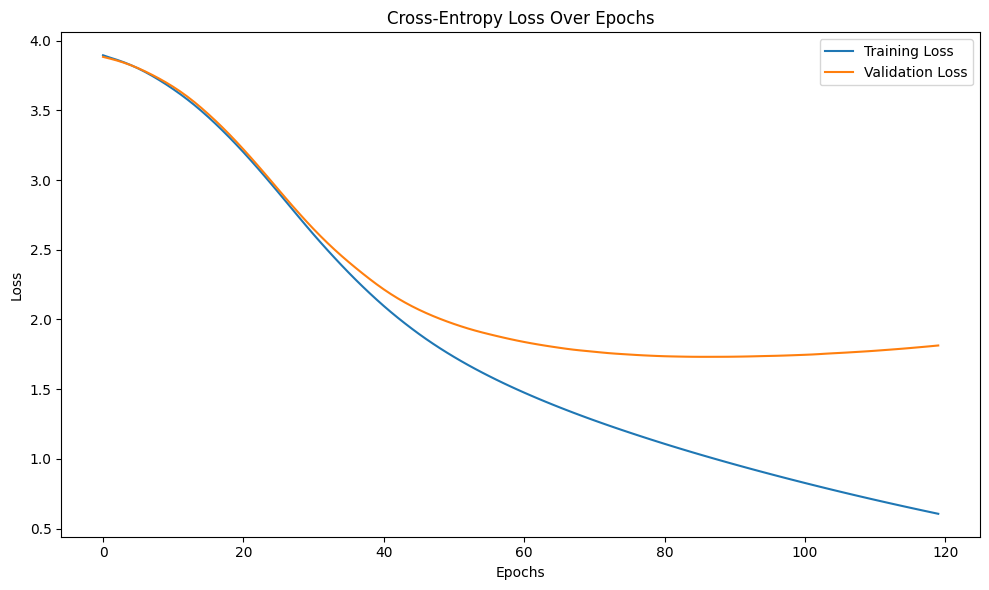

49


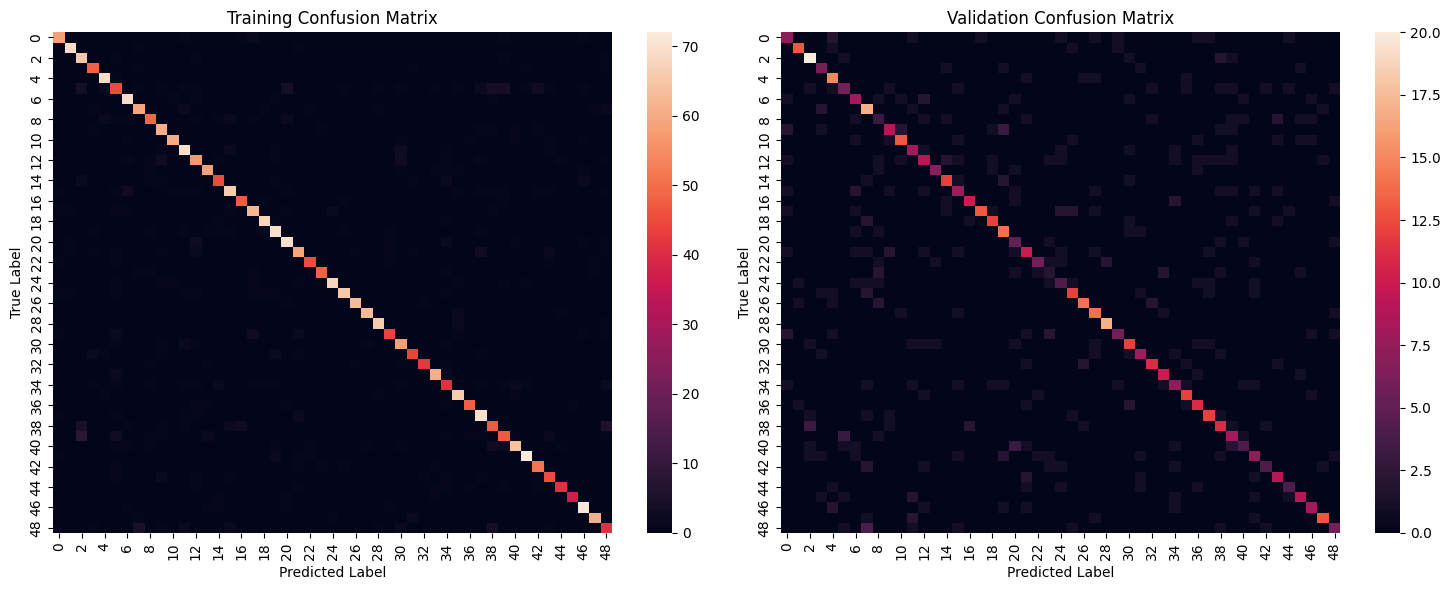

In [16]:
m3 = NeuralNetworkPytorch(input_size=784, hidden_layers=[100, 80], num_classes=49)
m3.train_model(X_train, y_train, X_val=X_valid, y_val=y_valid, epochs=120)

m3.accuracy(X_train, y_train, X_valid, y_valid)
m3.plot_losses()
m3.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)

Epoch 1/300, Train Loss: 3.8912, Val Loss: 3.8888
Epoch 2/300, Train Loss: 3.8872, Val Loss: 3.8838
Epoch 3/300, Train Loss: 3.8814, Val Loss: 3.8753
Epoch 4/300, Train Loss: 3.8721, Val Loss: 3.8602
Epoch 5/300, Train Loss: 3.8558, Val Loss: 3.8365
Epoch 6/300, Train Loss: 3.8290, Val Loss: 3.8024
Epoch 7/300, Train Loss: 3.7888, Val Loss: 3.7551
Epoch 8/300, Train Loss: 3.7346, Val Loss: 3.6922
Epoch 9/300, Train Loss: 3.6668, Val Loss: 3.6204
Epoch 10/300, Train Loss: 3.5892, Val Loss: 3.5416
Epoch 11/300, Train Loss: 3.5059, Val Loss: 3.5114
Epoch 12/300, Train Loss: 3.4659, Val Loss: 3.5438
Epoch 13/300, Train Loss: 3.5050, Val Loss: 3.3630
Epoch 14/300, Train Loss: 3.3054, Val Loss: 3.4205
Epoch 15/300, Train Loss: 3.3468, Val Loss: 3.2679
Epoch 16/300, Train Loss: 3.1970, Val Loss: 3.2209
Epoch 17/300, Train Loss: 3.1522, Val Loss: 3.1932
Epoch 18/300, Train Loss: 3.1186, Val Loss: 3.0831
Epoch 19/300, Train Loss: 2.9954, Val Loss: 3.0771
Epoch 20/300, Train Loss: 2.9778, Val Lo

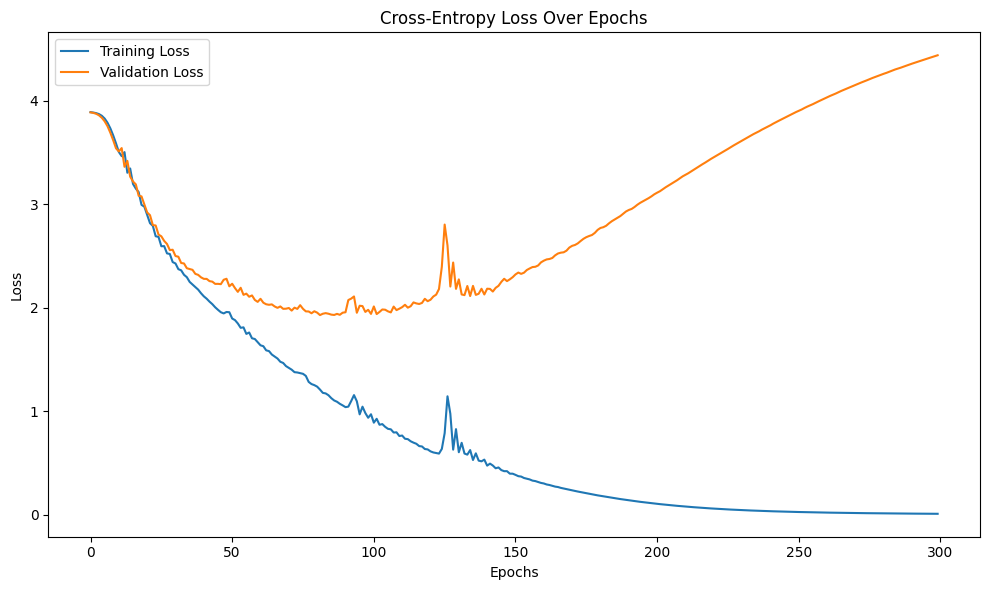

49


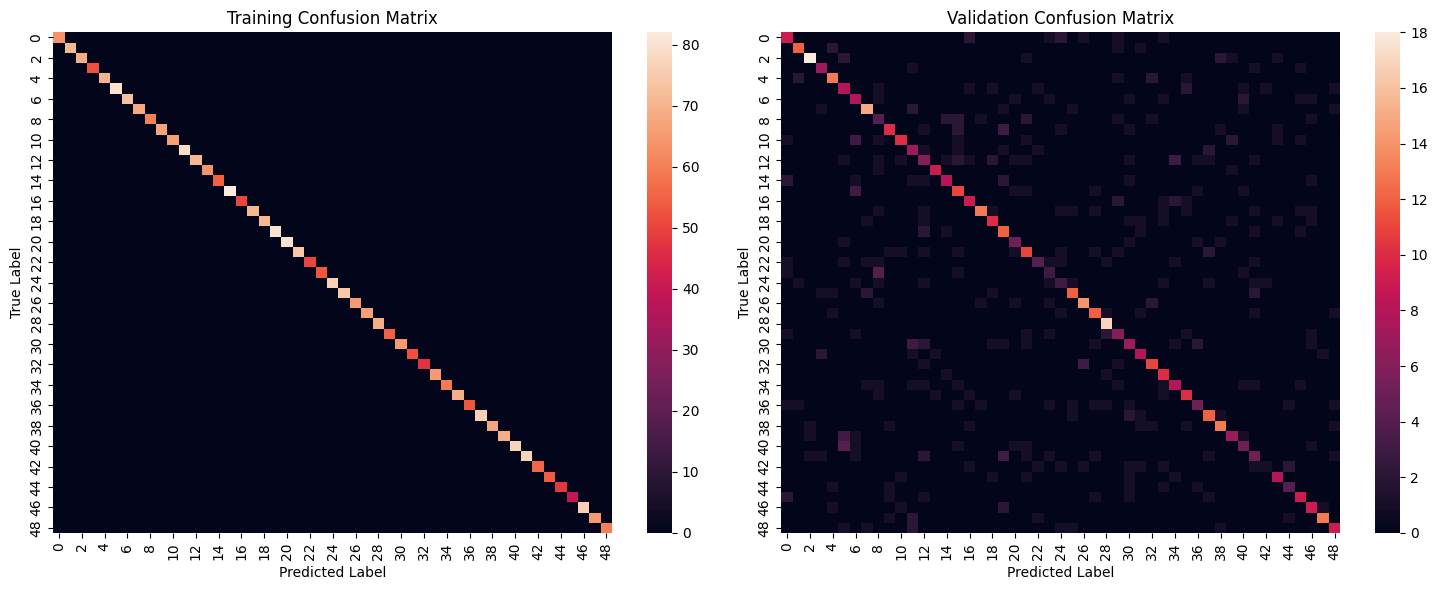

In [17]:
m4 = NeuralNetworkPytorch(input_size=784, hidden_layers=[600, 400, 300, 200, 100], num_classes=49)
m4.train_model(X_train, y_train, X_val=X_valid, y_val=y_valid, epochs=300)

m4.accuracy(X_train, y_train, X_valid, y_valid)
m4.plot_losses()
m4.plot_confusion_matrix(X_train, y_train, X_valid, y_valid)


### Rendimiento de los modelos sobre el conjunto de Test

Train Accuracy: 87.22%
Validation Accuracy: 58.40%
Train Accuracy: 87.28%
Validation Accuracy: 58.40%
Train Accuracy: 100.00%
Validation Accuracy: 54.70%


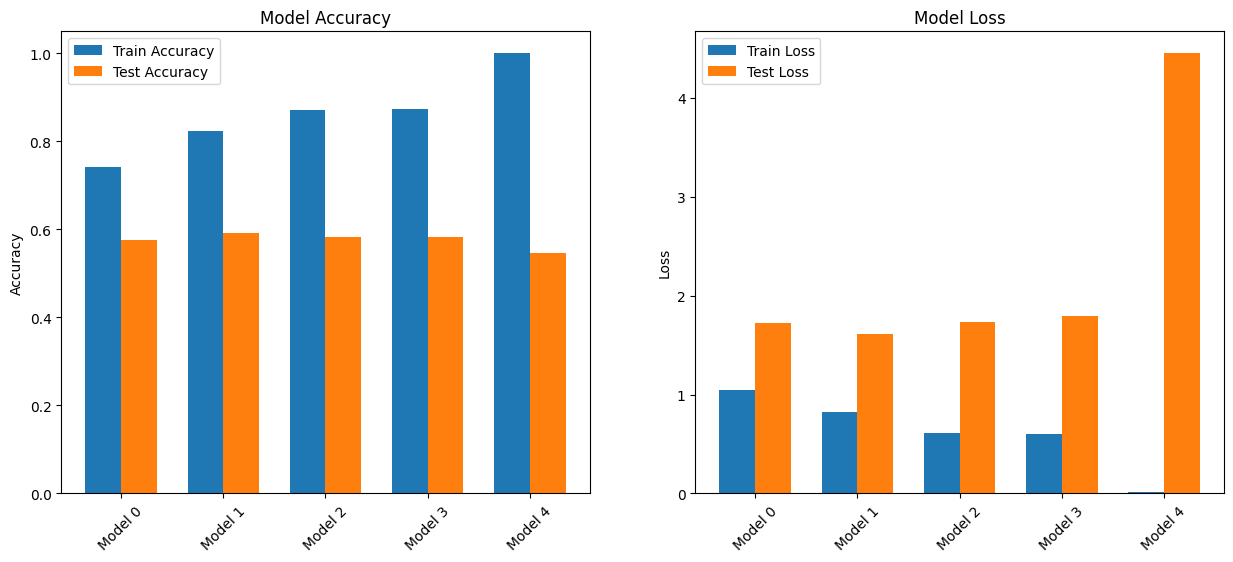

In [18]:
models = [m0, m1, m2, m3, m4]
plot_model_performance(models, X_train, y_train, X_test, y_test)

### Desafío

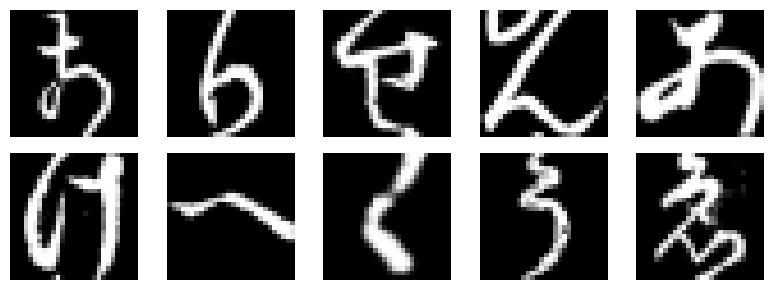

Number of images: 1000


In [ ]:
COMP_images = np.load("data/X_COMP.npy")

pr.plot_images(COMP_images, nrows=2, ncolumns=5)
print(f'Number of images: {len(COMP_images)}')